<a href="https://colab.research.google.com/github/adityasahu88/ML_PROJECTS/blob/main/BREAST_CANCER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Description**
- Objective: Predict whether a tumor is malignant or benign based on input features.
- Number of Instances (Samples): 569
- Number of Features: 30 (numeric, real-valued features)
- Target Classes: 2

  - 0: Malignant (cancerous)
  - 1: Benign (non-cancerous)

**Features**
The dataset contains 30 numerical features derived from digitized images of fine-needle aspirates (FNAs) of breast masses. These features describe the characteristics of the cell nuclei present in the images.

**Features Categories:**
  - Mean Values: Mean of each feature for all cells.
  - Standard Error: Standard error of each feature for all cells.
  - Worst (Largest) Values: Worst (or largest) value for each feature across all cells.

**Key Features (10 groups):**
- Radius: Mean of distances from center to points on the perimeter.
- Texture: Standard deviation of gray-scale values.
- Perimeter: Perimeter of the tumor.
- Area: Area of the tumor.
- Smoothness: Local variation in radius lengths.
- Compactness:
- Concavity: Severity of concave portions of the contour.
- Concave Points: Number of concave portions of the contour.
- Symmetry: Symmetry of the tumor.
- Fractal Dimension: "Coastline approximation"—how complex the boundary is.

**Target**
- 0: Malignant (212 samples)
- 1: Benign (357 samples)

In [3]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
# Load the Datasets
data  =load_breast_cancer()
X = data.data
y= data.target

df = pd.DataFrame(X,columns =data.feature_names)
df['target']=y



In [5]:
# Load the Dataset with sample 10 records
df.head(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [6]:

# Shape of the Dataset
print(df.shape)

(569, 31)


In [7]:

# Describe the Dataset
df.describe()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:

# Information about the Dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:

# Check for Missing Values
print(df.isnull().sum())


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [10]:

# Check for Duplicates
print(df.duplicated().sum())


0


In [11]:

# Check for Class Imbalance
print(df['target'].value_counts())

target
1    357
0    212
Name: count, dtype: int64


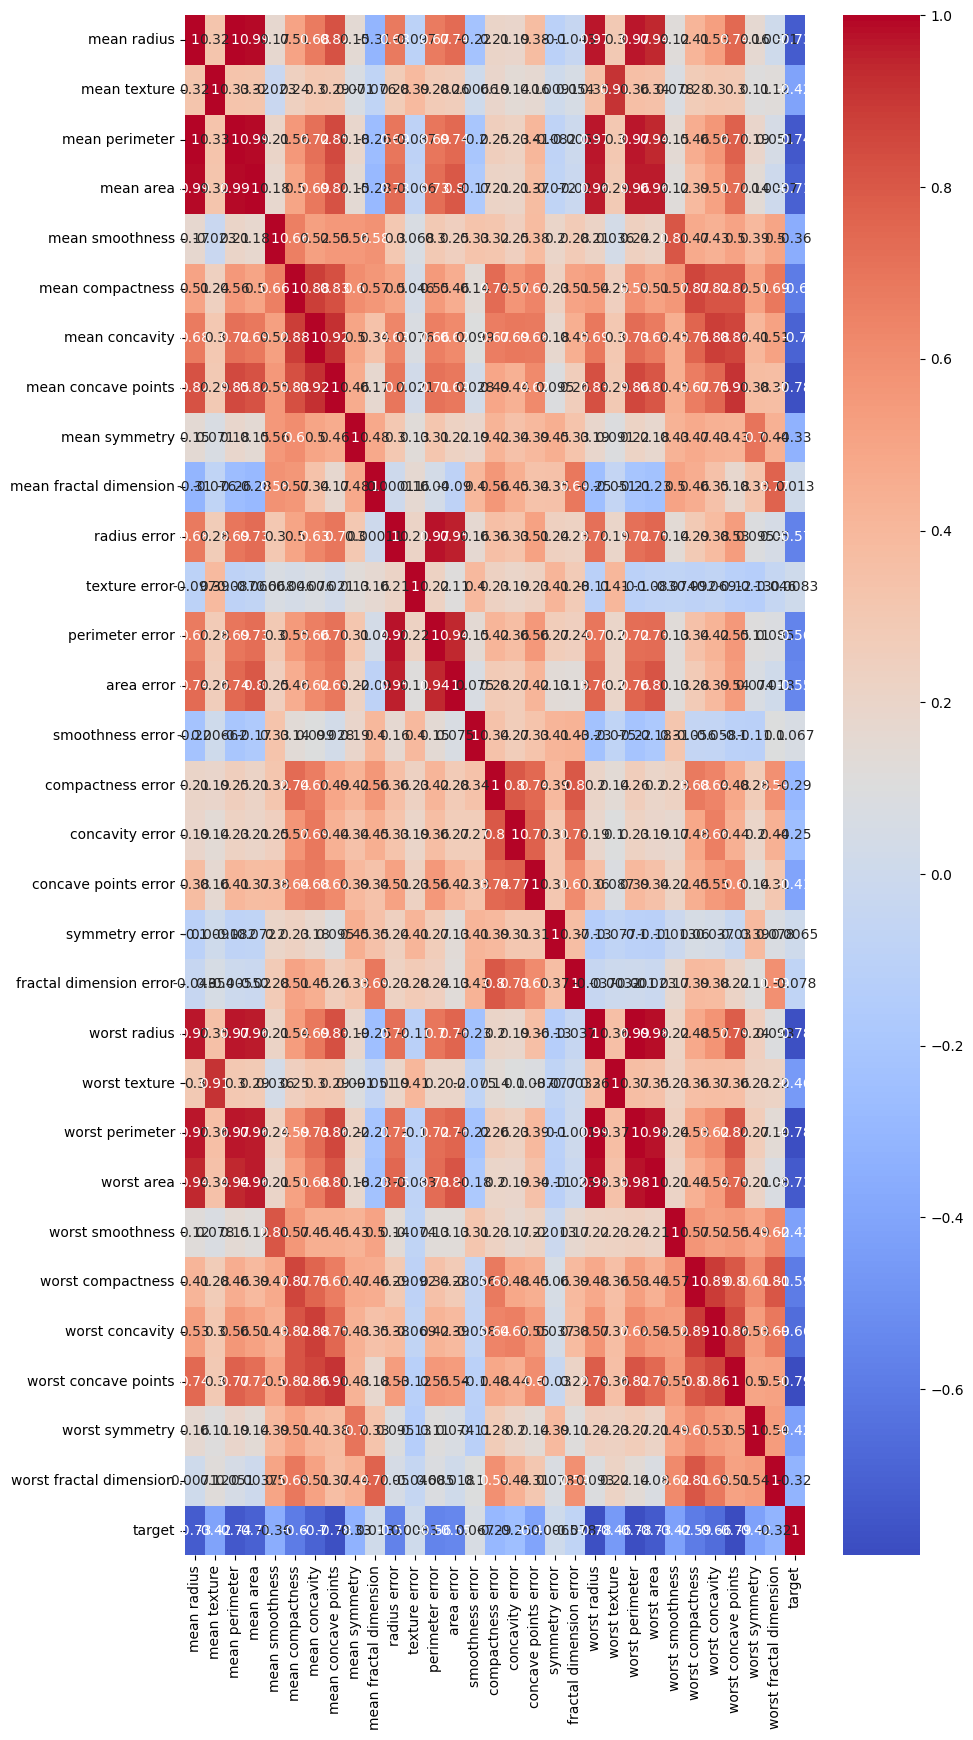

In [12]:
# Lets Visualize the data in for More EDA
# Correlation factor

plt.figure(figsize=(10,20))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()


In [13]:
list(df.columns)[:-1]

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

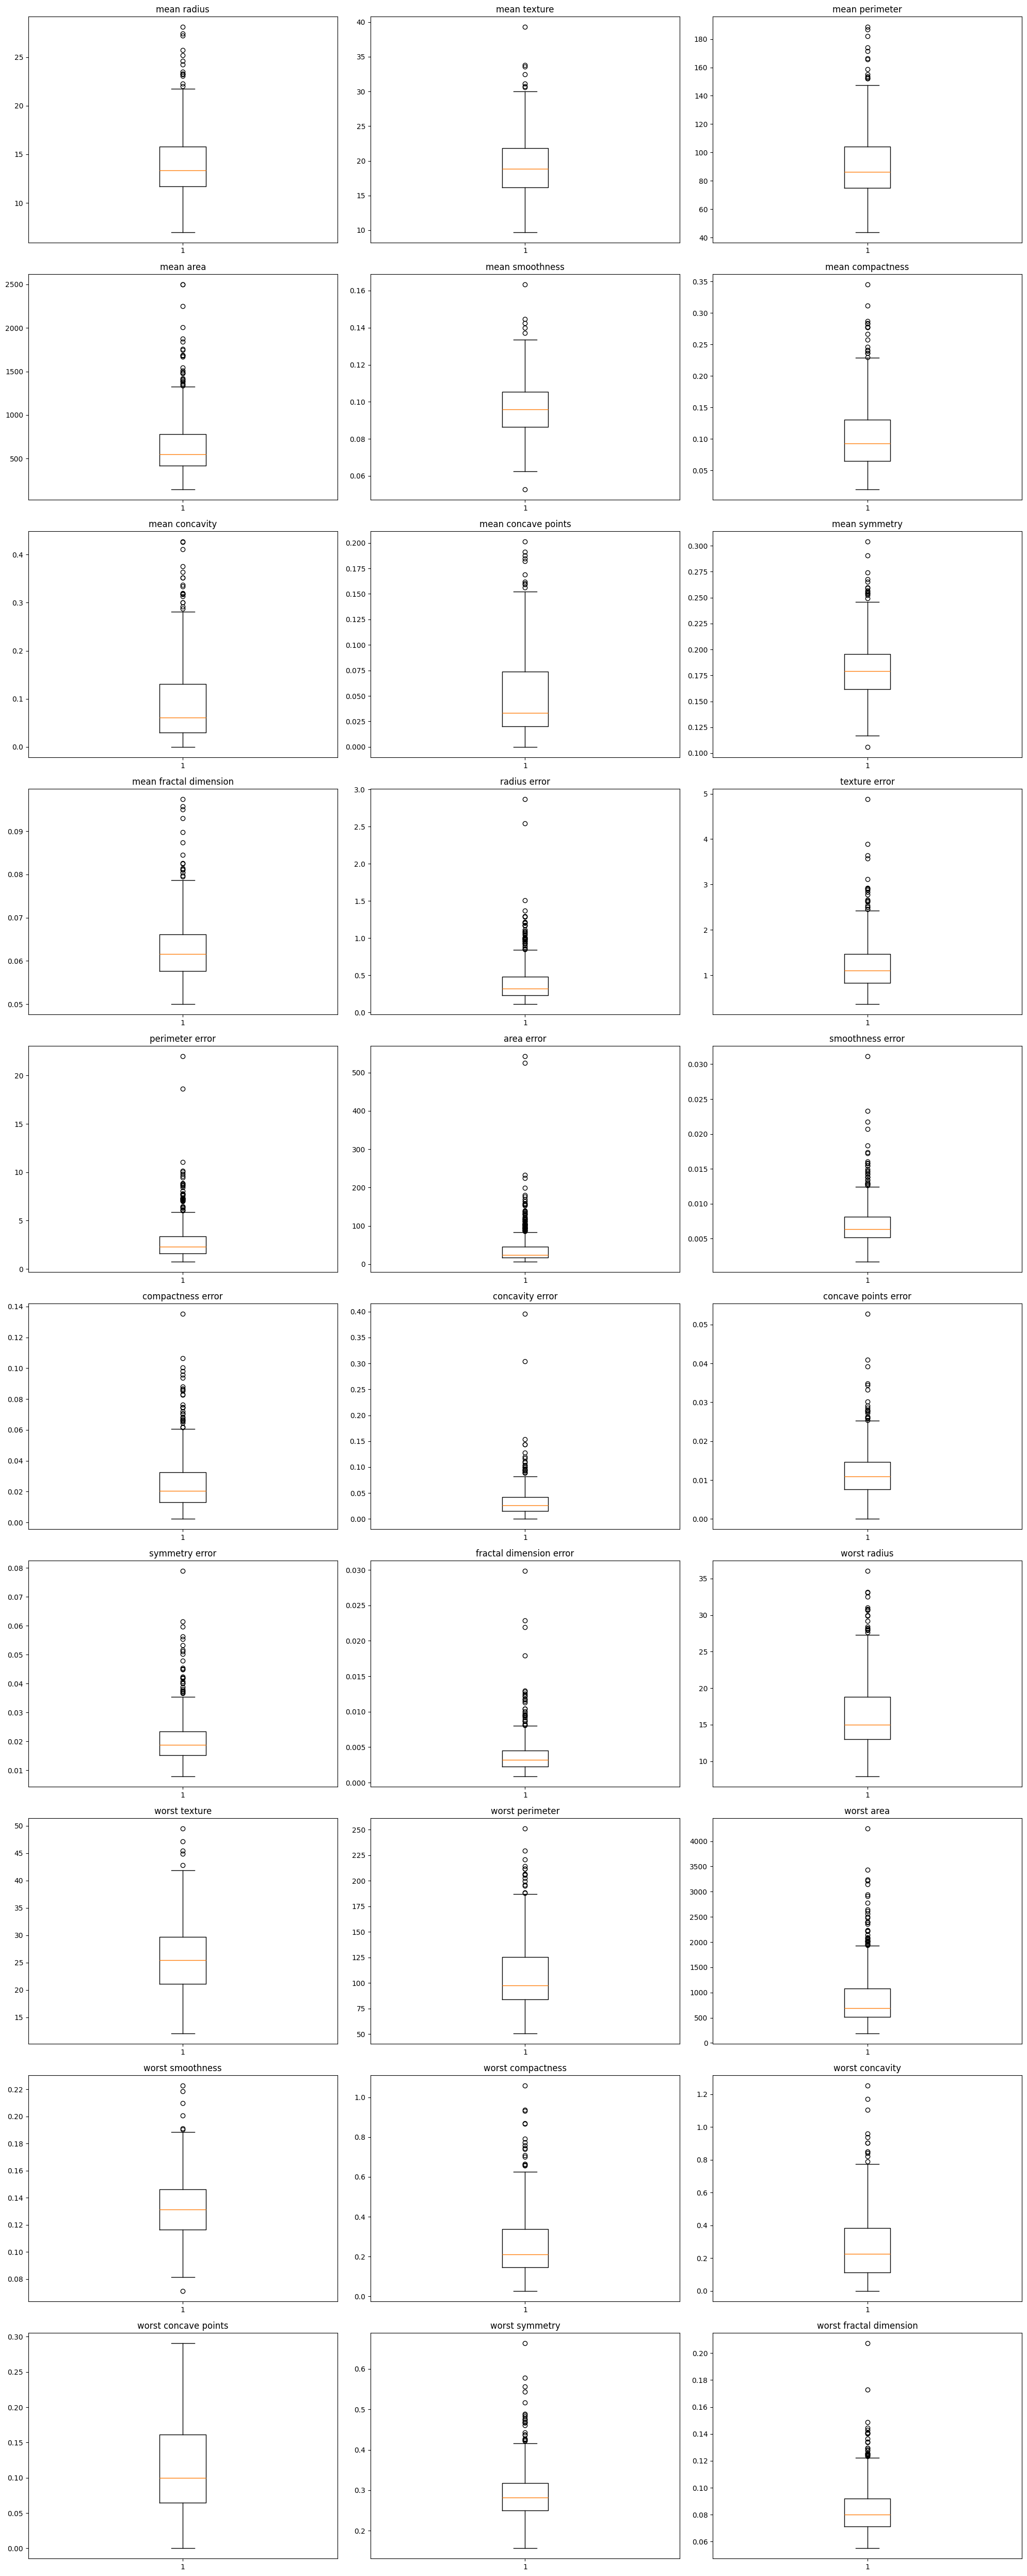

In [14]:
import warnings
warnings.filterwarnings('ignore')
# Check for outliers for each features
no_columns =3
no_features =len(list(df.columns)[:-1])
features =(list(df.columns)[:-1])
no_rows = int(np.ceil((no_features)/no_columns))
plt.subplots(no_rows,no_columns,figsize=(20,50))
for i,column in enumerate(features):
  plt.subplot(no_rows,no_columns,i+1)
  plt.boxplot(df[column])
  plt.title(column)
  plt.tight_layout()
plt.show()


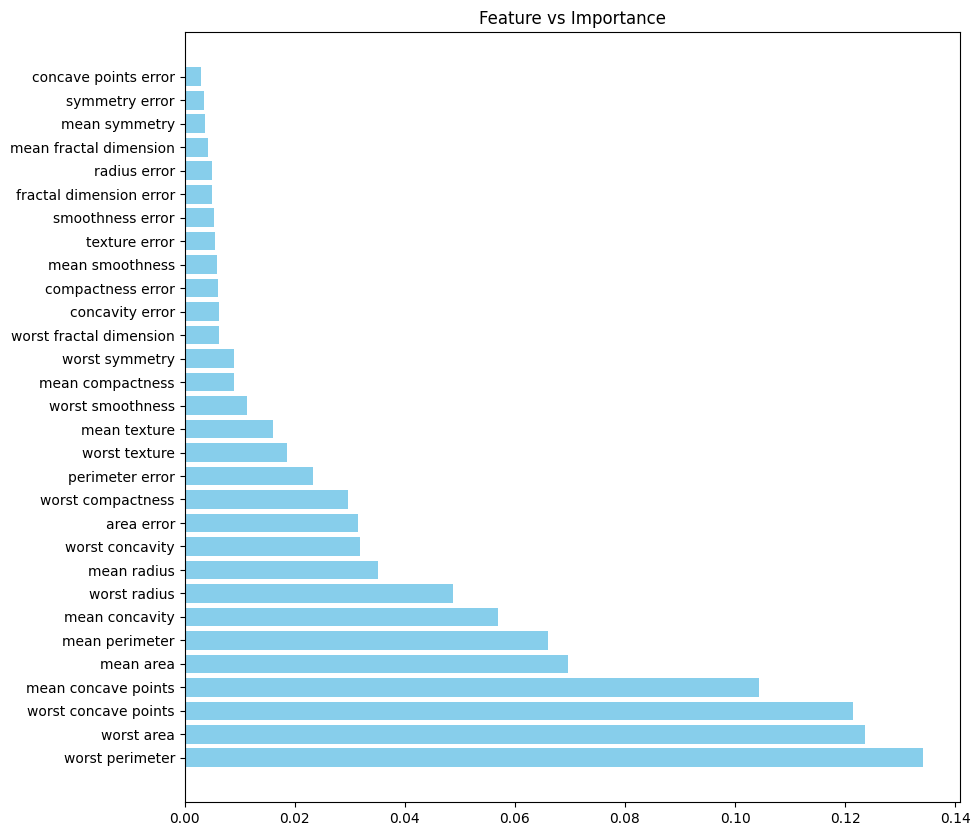

In [15]:
# Find the important features

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)
importance = rf.feature_importances_
columns = list(df.columns)[:-1]
feature_imp = pd.DataFrame(zip(columns,importance),columns =["Features","Importance"])
feature_imp.sort_values(by='Importance',inplace=True,ascending =False)

# Plot the bar chart for Visualization purpose
plt.figure(figsize =(10,10))
plt.barh(feature_imp['Features'],feature_imp['Importance'],color="skyblue")
plt.title("Feature vs Importance")
plt.show()


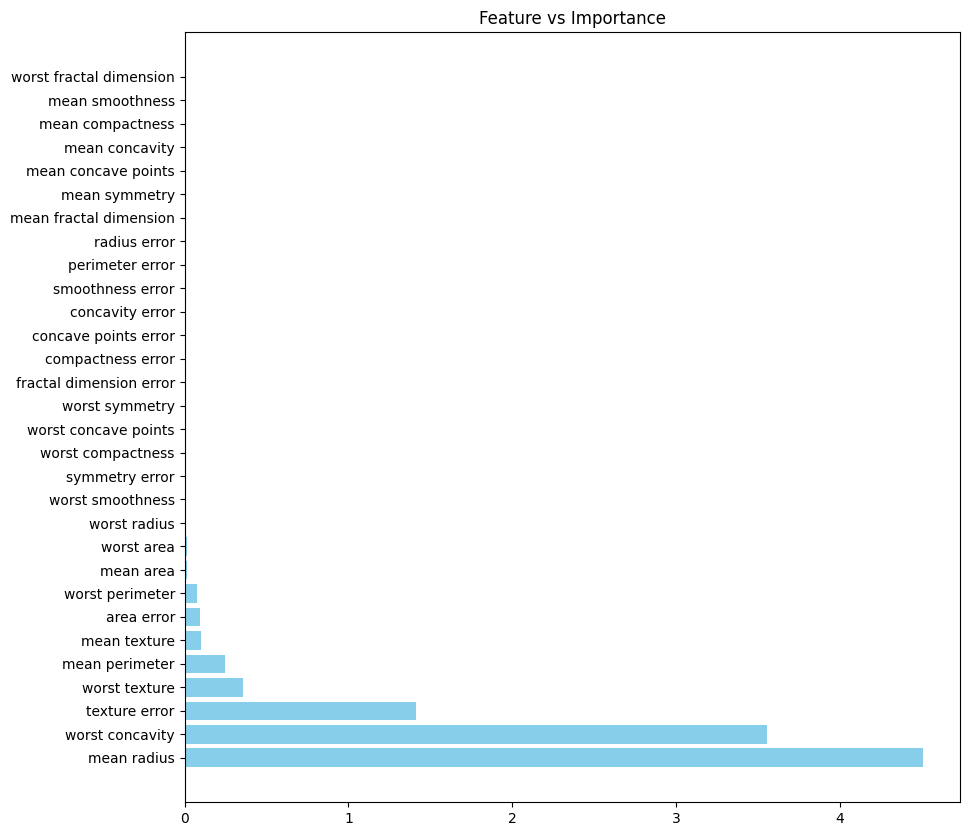

In [16]:
# Using lasso Regulariztion
from sklearn.linear_model import LogisticRegression
lasso = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000, multi_class='ovr')
lasso.fit(X,y)
importance = np.abs(lasso.coef_).mean(axis=0)
columns = list(df.columns)[:-1]
feature_imp = pd.DataFrame(zip(columns,importance),columns =["Features","Importance"])
feature_imp.sort_values(by='Importance',inplace=True,ascending =False)

# Plot the bar chart for Visualization purpose
plt.figure(figsize =(10,10))
plt.barh(feature_imp['Features'],feature_imp['Importance'],color="skyblue")
plt.title("Feature vs Importance")
plt.show()




In [17]:
# lets find the important features
feature =feature_imp[feature_imp['Importance']>0.05]['Features'].values
feature_list = list(feature)
feature_list.append('target')
df =df[feature_list]

**Decision Tree**

Accuracy on Train Data: 1.0
Accuracy on Test Data: 0.9210526315789473
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        43
           1       0.93      0.94      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



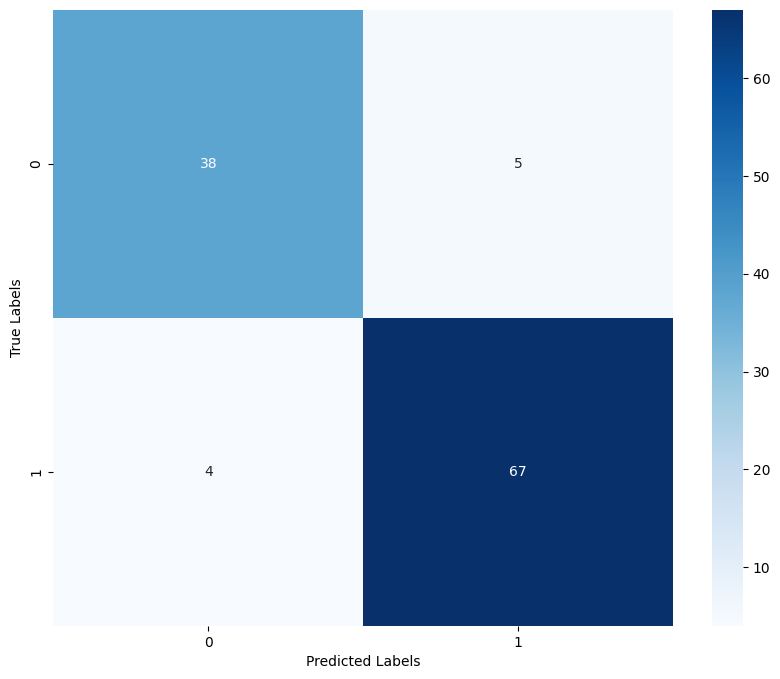

In [18]:
X = df.drop('target',axis=1)
y =df['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)


model_tree =DecisionTreeClassifier()
model_tree.fit(X_train,y_train)
y_pred = model_tree.predict(X_test)
y_train_pred = model_tree.predict(X_train)

print(f"Accuracy on Train Data: {accuracy_score(y_train,y_train_pred)}")
print(f"Accuracy on Test Data: {accuracy_score(y_test,y_pred)}")

print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

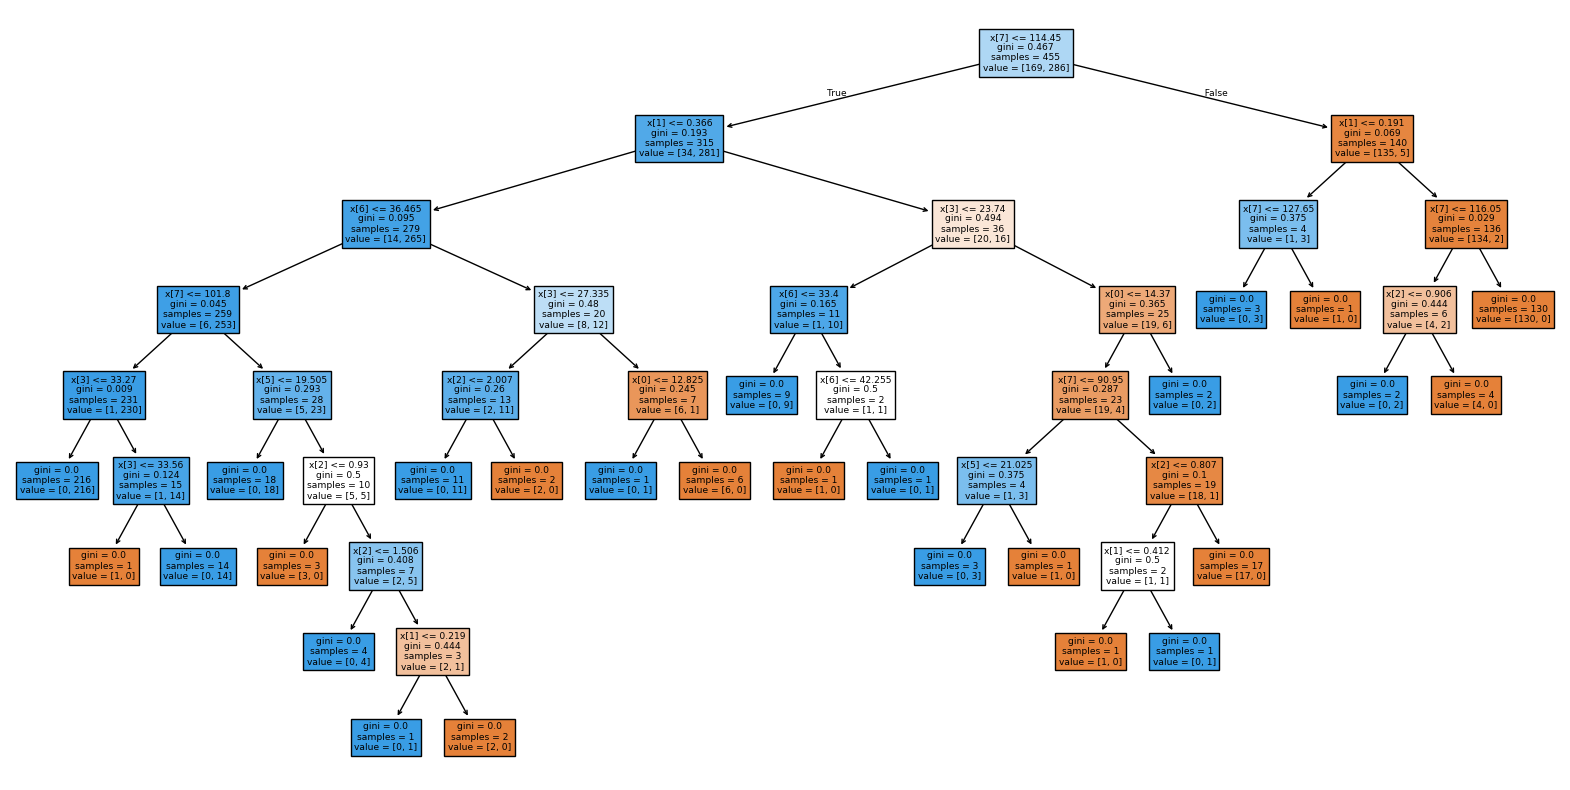

In [19]:
# isualize the Decision Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model_tree,filled=True)
plt.show()

In [20]:
# let's use the Hyper parameter
from sklearn.model_selection import GridSearchCV
param ={
    'criterion': ['gini','entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(),param,cv=5)
grid_search.fit(X_train,y_train)
best_param = grid_search.best_params_
print(f"Best Parameters: {best_param}")

# Get the best model
best_model = grid_search.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Evaluate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Evaluate accuracy on the train set
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy on train set:", accuracy)




Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5}
Accuracy on test set: 0.9035087719298246
Accuracy on train set: 0.9714285714285714


**Random Forest**

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_rf_model = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search_rf_model.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_rf_model.best_params_)

# Get the best model
best_model = grid_search_rf_model.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)

# Evaluate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on test set: 0.9736842105263158


**KNN**

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param = {
    'n_neighbors': [3, 5, 7, 9,11,13,15,17,19,21],
    'weights': ['uniform', 'distance']

}

grid_search_knn =GridSearchCV(KNeighborsClassifier(),param,cv=5)
grid_search_knn.fit(X_train,y_train)

best_param =grid_search_knn.best_params_

print(f"Best Parameters: {best_param}")

# Get the best model
best_model = grid_search_knn.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

# Evaluate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Evaluate accuracy on the Train set
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy on train set:", accuracy)


Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
Accuracy on test set: 0.9649122807017544
Accuracy on train set: 1.0
